In [ ]:
!pip install matplotlib

In [ ]:
!pip install snntorch

In [ ]:
#!pip install --upgrade torch

In [ ]:
import torch
import snntorch as snn
from snntorch import spikegen
import time

In [ ]:
# Define a simple ANN
class SimpleANN(torch.nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.fc1 = torch.nn.Linear(10, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        return self.relu(x)

In [ ]:
# Convert ANN to SNN
class SimpleSNN(torch.nn.Module):
    def __init__(self):
        super(SimpleSNN, self).__init__()
        self.fc1 = torch.nn.Linear(10, 10)
        self.lif1 = snn.Leaky(beta=0.5)

    def forward(self, x):
        mem = self.lif1(self.fc1(x))
        return mem

In [ ]:
# Function to test the performance of the network
def test_performance(model, input_data):
    start_time = time.time()
    output = model(input_data)
    end_time = time.time()
    return output, end_time - start_time

In [ ]:
# Initialize models
ann = SimpleANN()
snn = SimpleSNN()

In [ ]:
# Generate random input data
input_data = torch.rand(1, 10)

In [ ]:
# Test ANN performance
ann_output, ann_time = test_performance(ann, input_data)
print(f"ANN output: {ann_output}\nTime taken: {ann_time} seconds")

ANN output: tensor([[0.0000, 0.2688, 0.2265, 0.0000, 0.0000, 0.8848, 0.2036, 0.0000, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)
Time taken: 0.0012357234954833984 seconds


In [ ]:
#Test SNN performance and collect outputs at each time step
time_steps = 100
snn_outputs = torch.zeros(time_steps, 10)  # Assuming 10 output neurons
input_data = input_data.repeat(time_steps, 1, 1)

In [ ]:
# Test SNN performance
# Note: SNNs operate over time, so input data needs a time dimension
#time_steps = 100
#input_data = input_data.repeat(time_steps, 1, 1)
##snn_output, snn_time = test_performance(snn, input_data)
#print(f"SNN output at last time step: {snn_output[-1]}\nTime taken: {snn_time} seconds")

SNN output at last time step: tensor([[[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0.0135,
          -0.3046,  0.0785,  0.3943]],

        [[-0.8301,  0.4061,  0.1357, -0.0785,  0.4388,  0.1703,  0

In [ ]:
import matplotlib.pyplot as plt

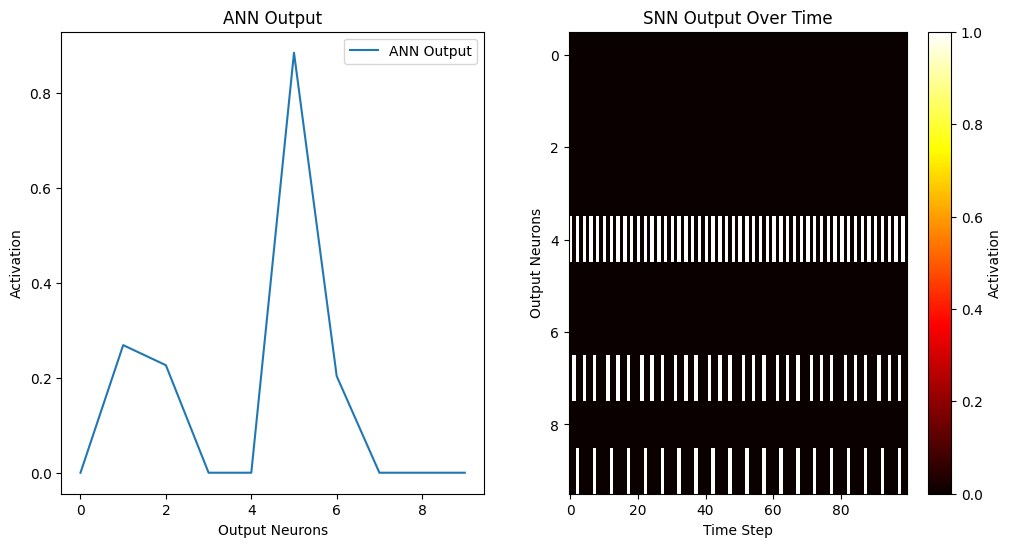

In [ ]:
for t in range(time_steps):
    snn_output, _ = snn(input_data[t])  # Extracting the relevant output from the tuple
    snn_outputs[t] = snn_output

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ann_output.detach().numpy().flatten(), label='ANN Output')
plt.title('ANN Output')
plt.xlabel('Output Neurons')
plt.ylabel('Activation')
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(snn_outputs.detach().numpy().T, cmap='hot', aspect='auto')
plt.colorbar(label='Activation')
plt.title('SNN Output Over Time')
plt.xlabel('Time Step')
plt.ylabel('Output Neurons')
plt.show()